In [2]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("artifacts/data_ingestion/data.csv")
data.shape

(569, 32)

In [4]:
##SUMMARY STATISTICS
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
#CHECK FOR MISSING VALUES
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
data = data.drop(['id'], axis =1)
data['diagnosis'] = data['diagnosis'].replace({"M": 1, "B": 0})
data.head()

/var/folders/04/h0kggvk534qc2qp5w2tb2jlm0000gn/T/ipykernel_18977/848340151.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis'] = data['diagnosis'].replace({"M": 1, "B": 0})


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


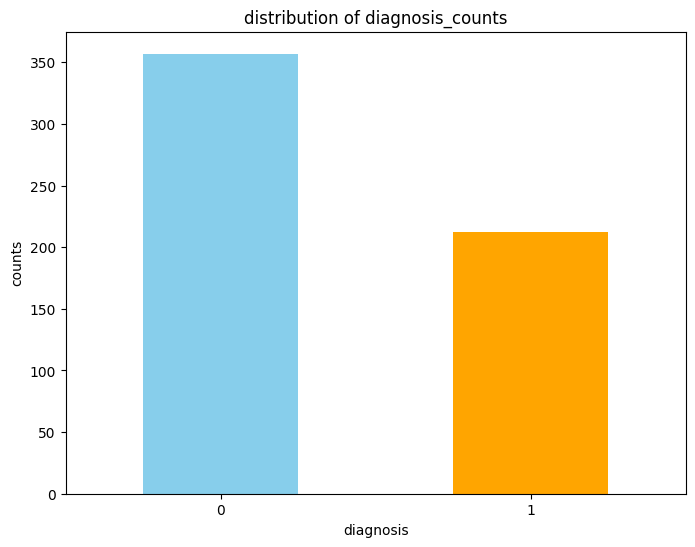

In [7]:
#EXAMINE THE DISTRIBUTION OF THE TARGET VARIABLE TO UNDERSTAND CLASS BALANCE
diagnosis_counts = data['diagnosis'].value_counts()

plt.figure(figsize=(8,6))
diagnosis_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("distribution of diagnosis_counts")
plt.xlabel("diagnosis")
plt.ylabel("counts")
plt.xticks(rotation = 0)
plt.show()

In [8]:
max_values = data.max()
min_values = data.min()
max_min_df = pd.DataFrame({"max_values": max_values, "min_values": min_values})
max_min_df

,max_values,min_values
diagnosis,1.00000,0.000000
radius_mean,28.11000,6.981000
texture_mean,39.28000,9.710000
perimeter_mean,188.50000,43.790000
area_mean,2501.00000,143.500000
smoothness_mean,0.16340,0.052630
compactness_mean,0.34540,0.019380
concavity_mean,0.42680,0.000000
concave points_mean,0.20120,0.000000
symmetry_mean,0.30400,0.106000


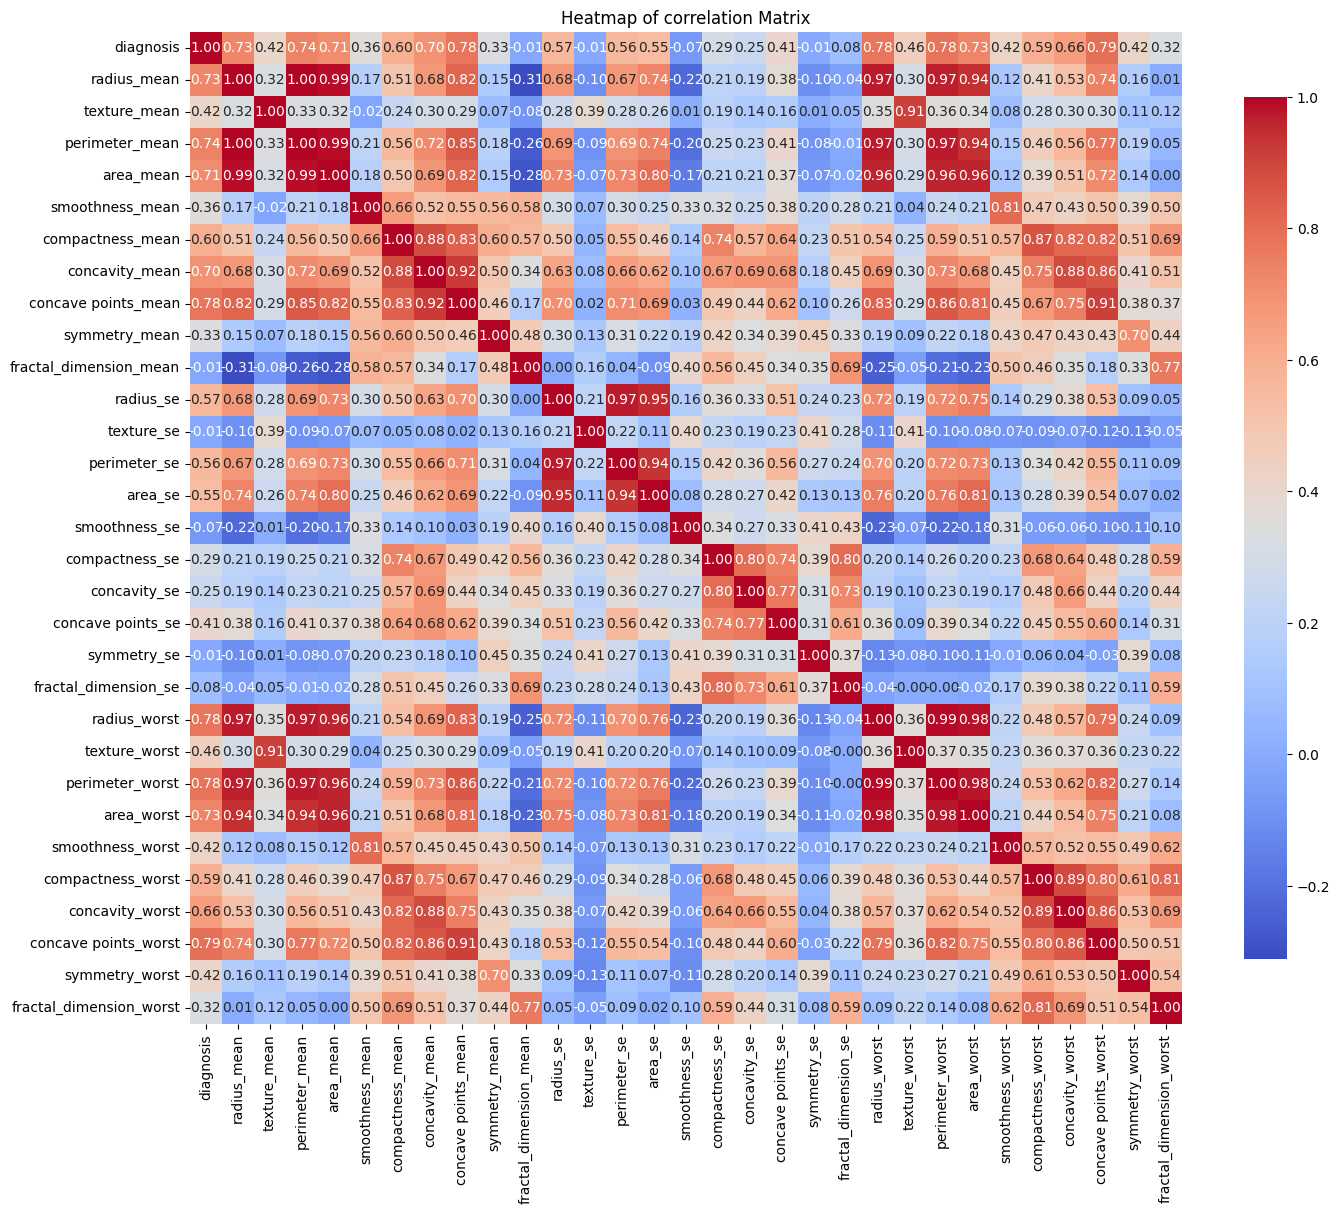

In [9]:
#ANALYZE THE CORRELATION BETWEEN DIFFERENT NUMERICAL VARIABLES & TARGET VARIABLE TO IDENTIFY IMPORTANT FEATURES
correlation_matrix = data.corr()

plt.figure(figsize=(16, 14))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Heatmap of correlation Matrix")
plt.show()

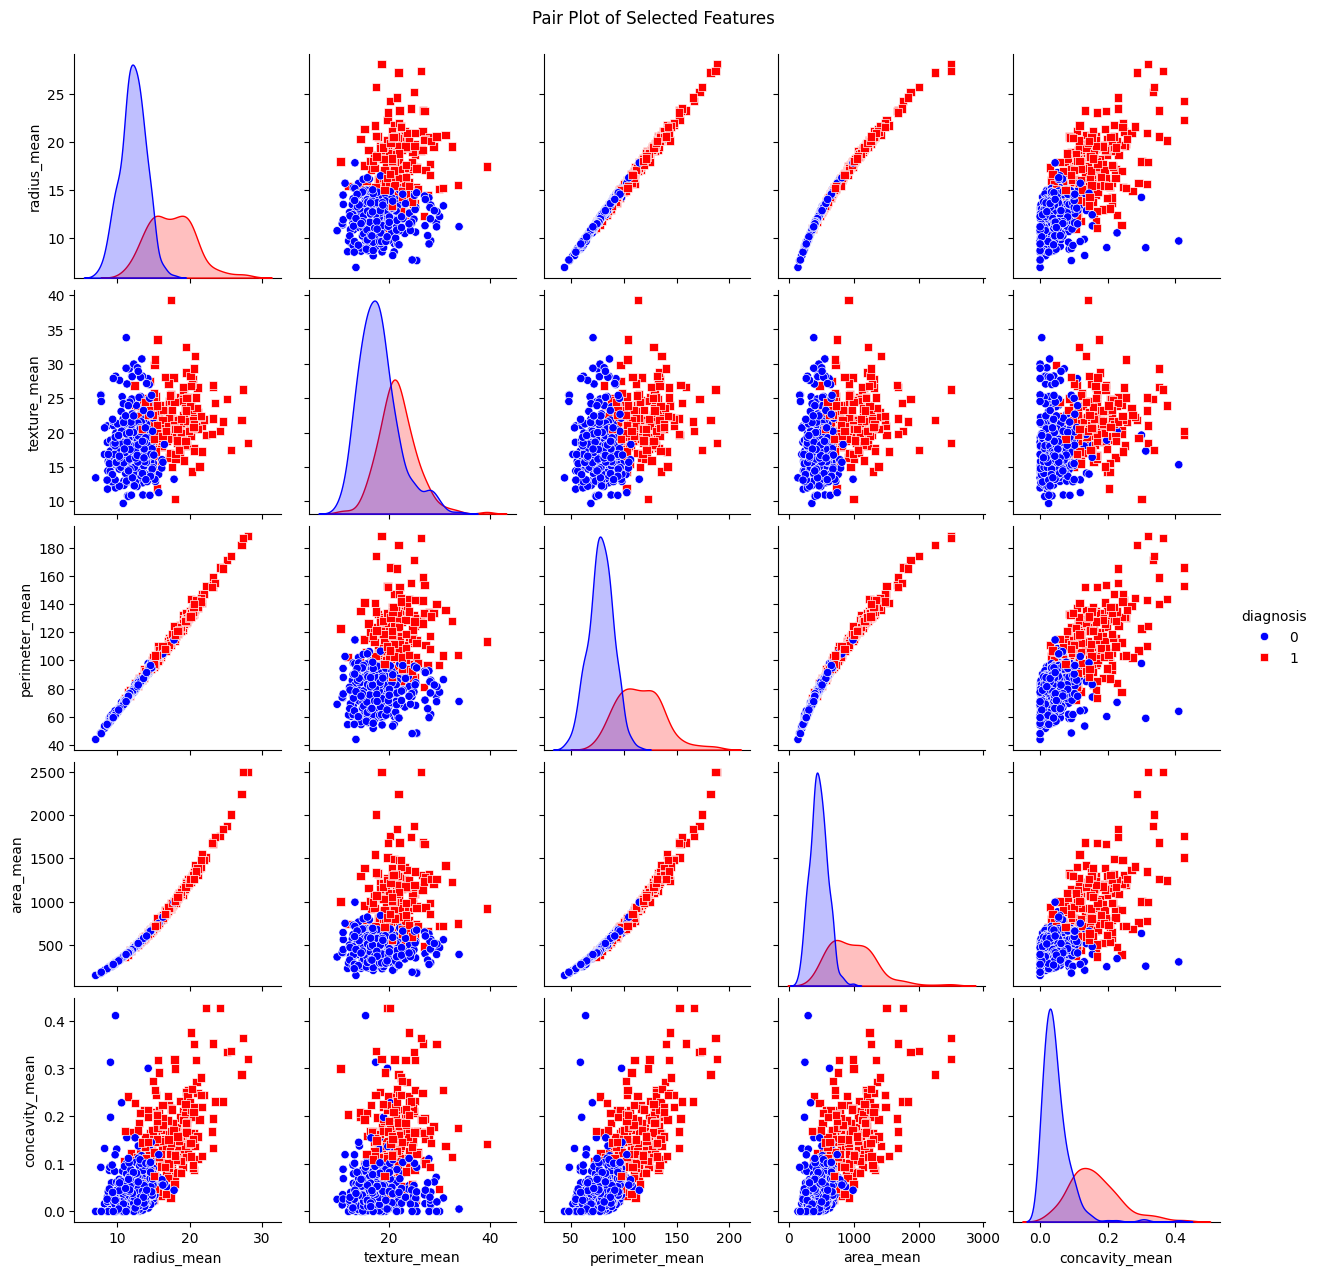

In [11]:
#CREATE VISUALIZATION TO FURTHER UNDERSTAND THE DISTRIBUTION & RELATIONSHIP BETWEEN VARIABLES
features_subset = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'diagnosis']

# Create a pair plot
sns.pairplot(data[features_subset], hue='diagnosis', palette={1: "red", 0: "blue"}, diag_kind='kde', markers=["o", "s"])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

1. Radius Mean vs Diagnosis: Malignant tumors (red) tend to have higher radius mean values compared to benign tumors (blue).
2. Texture Mean vs Diagnosis: There is some separation, but not as distinct as radius mean.
3. Perimeter Mean vs Diagnosis: Malignant tumors generally have higher perimeter mean values.
4. Area Mean vs Diagnosis: Malignant tumors show higher area mean values.
5. Concavity Mean vs Diagnosis: Malignant tumors have higher concavity mean values.

In [17]:
# FEATURE ENGINEERING
# CREATE ADDITIONAL FEATURES IF NEEDED, BASED ON DOMAIN KNOWLEDGE OR INTERACTION BETWEEN EXISTING FEATURES
# TRANSFORM EXISTING FEATURES (SCALING)
# GENERATE POLYNOMIAL FEATURES TO CAPTURE NON_LINEAR RELATIONSHIP


from sklearn.preprocessing import StandardScaler

# List of numerical features to scale
numerical_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]

# Initialize the scaler
scaler = StandardScaler() # brings the data to mean (mu) = 0 and standard deviation (sigma) = 1. eqn = [(x-mu)/sigma]

# Fit and transform the numerical features
data_scaled = data.copy()
data_scaled[numerical_features] = scaler.fit_transform(data_scaled[numerical_features])

data_scaled.describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,0.372583,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,0.483918,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,0.000000,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,0.000000,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,0.000000,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,1.000000,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,1.000000,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [18]:
max_values = data_scaled.max()
min_values = data_scaled.min()
max_min_df = pd.DataFrame({"max_values": max_values, "min_values": min_values})
max_min_df

,max_values,min_values
diagnosis,1.000000,0.000000
radius_mean,3.971288,-2.029648
texture_mean,4.651889,-2.229249
perimeter_mean,3.976130,-1.984504
area_mean,5.250529,-1.454443
smoothness_mean,4.770911,-3.112085
compactness_mean,4.568425,-1.610136
concavity_mean,4.243589,-1.114873
concave points_mean,3.927930,-1.261820
symmetry_mean,4.484751,-2.744117


In [19]:
from sklearn.model_selection import train_test_split

X = data_scaled.drop(columns=['diagnosis'], axis = 1)
y = data_scaled['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [20]:
y_train.value_counts(normalize=True)

diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64

1. Oversampling the minority class (Malignant).
2. Undersampling the majority class (Benign).

Let's use the Synthetic Minority Over-sampling Technique (SMOTE) to balance the classes in the training set.

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

y_train_resampled.value_counts(normalize=True)

diagnosis
1    0.5
0    0.5
Name: proportion, dtype: float64

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train_resampled, y_train_resampled)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"accuracy: {accuracy}, precision: {precision}, recall: {recall}, f1: {f1}")
print(report)

accuracy: 0.9736842105263158, precision: 0.975609756097561, recall: 0.9523809523809523, f1: 0.963855421686747
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

